### tests :

We would like to know why the algorithm calculates a lot of states near the intermediary states. 

Ideas: 
   - plot the fidelity towards the intermediary state. We will have 3 plots in the case where we have 
    3 intermediary states.
    
   - plot $\lambda$ vs time

In this notebook, we are searching a usecase for intermediary states. This mean that we would like to find a trajectory with intermediary states that follows the geodesic in a better way than a continuos trajectory

## Setup 3 with Python code

Without and with intermediary states.
At the end, one will find the plots comparing both results.

In [1]:
# libraries
import numpy as np
import matplotlib as mpl
from matplotlib import cm
#from sympy.solvers import solve
#from sympy import Symbol
#
#from scipy.optimize import minimize
#from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import axes3d

import qutip


from contrlwgeo import geodesic
from contrlwgeo import fidelity
from contrlwgeo.pauli_mat_vec import *
from contrlwgeo.utils import delete_less_than_k
from contrlwgeo.controlSetup3 import control1setup3,control1setup3_int_states
from contrlwgeo.getTimeFidelity import get_time_fidelity


%matplotlib widget
#

Control activated and ready to use


In [2]:
## this cell is to have nice plots
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# test
#vect1= np.array([0.0,0.0,0.99])
#vect2= np.array([0.99,0.0,0.0])
#geodesic(0.5,vect1,vect2)

In [4]:
# Test values
#qsri = 1/np.sqrt(3)*np.array([1.0, 1.0, 0.9])
#qssf = np.array([0.0, 0.9, 0.0])
qsri = 1/np.sqrt(3)*np.array([0.7, 0.8, 0.8])
qssf = 1/np.sqrt(3)*np.array([0.2, 0.9, 0.0])
w0 = 5.0
gamma_0 = 0.01
gamma_c = 10
Nmax = 40
imax = 7
deltat = 0.0030

# Save initial and final states
auxri = qsri
auxsf = qssf

In [5]:
## testing cell
estadoslist, tiempolists, solution, vec_lambda = control1setup3(qsri,qssf,Nmax=Nmax,deltat=deltat)
#tiempolists
#vec_lam
estadoslist

[array([0.40414519, 0.46188022, 0.46188022]),
 array([0.37961291, 0.50613312, 0.43551888]),
 array([0.35305522, 0.54729677, 0.40708988]),
 array([0.32489164, 0.58518751, 0.37663321]),
 array([0.29559258, 0.61965519, 0.34416402]),
 array([0.26569362, 0.65058118, 0.3096603 ]),
 array([0.23582308, 0.67787255, 0.27304614]),
 array([0.20675607, 0.70144832, 0.23417317]),
 array([0.17952425, 0.72120693, 0.19282441]),
 array([0.15563593, 0.73694718, 0.14889171]),
 array([0.13726984, 0.74775859, 0.10473419]),
 array([0.12549994, 0.74956316, 0.07691919]),
 array([0.11780816, 0.74588008, 0.06581533]),
 array([0.11260874, 0.74056164, 0.06069716]),
 array([0.10930485, 0.7347359 , 0.05739472]),
 array([0.10738833, 0.72873121, 0.05470638]),
 array([0.10645523, 0.72266095, 0.05226665]),
 array([0.10620526, 0.71656917, 0.04995972]),
 array([0.1064202 , 0.71047523, 0.04774645]),
 array([0.10694207, 0.70438913, 0.04561146]),
 array([0.10765645, 0.69831698, 0.04354683]),
 array([0.10848058, 0.69226309, 0.

In [6]:
## testing cell

finalestados, finaltiempotot, list_lambda_time=get_time_fidelity(estadoslist,tiempolists,solution,imax,qssf)
###
# take account that the bigger imax the better the fidelity. But the improvement in the fidelity 
# is very small



Find time with fidelity
New quantum state [0.11727109 0.55114974 0.00840203]
Find time with fidelity
New quantum state [ 1.16570695e-01  5.49611334e-01 -2.75604922e-04]
Find time with fidelity
New quantum state [0.11583264 0.548331   0.00483199]
Find time with fidelity
New quantum state [0.12042668 0.53708929 0.00889563]
Find time with fidelity
New quantum state [0.11832547 0.53759832 0.00546652]
Find time with fidelity
New quantum state [0.11693966 0.53762977 0.00233406]
Find time with fidelity
New quantum state [0.11562313 0.53511379 0.00647534]


In [7]:
list(finalestados[30])[1]

0.6390087811231927

In [8]:
list_lambda_time

[3550.56674716773,
 2946.82286400747,
 3860.01315842326,
 4119.99229875714,
 6498.04565891621,
 6779.73378452170,
 5181.69239426769]

In [9]:
# radius
radius = [np.sqrt((finalestados[i][0])**2+(finalestados[i][1])**2+(finalestados[i][2])**2) for i in range(len(finalestados))]
listfidelities=[fidelity(finalestados[i],qssf) for i in range(len(finalestados))]

In [10]:
### plots

### bloch sphere
length = 1
nrm = mpl.colors.Normalize(0,length)
#colors = cm.winter(nrm(range(length))) # options: cool, summer, winter, autumn etc.
colors = cm.winter(range(length)) # options: cool, summer, winter, autumn etc.

b = qutip.Bloch(view=[170,50],figsize=[3,3])
b.sphere_alpha=0.2
b.point_color = ['r'] # options: 'r', 'g', 'b' etc.
b.point_marker = ['o']
b.point_size = [20]
for i in range(len(finalestados)):
    b.add_points(finalestados[i])
    
## ploting geodesic
Numbergeo = 250
geolist = [geodesic(t/Numbergeo,qsri,qssf) for t in range(Numbergeo+1)]
colors2 = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

vectorgeo = [bloch_vector(rho) for rho in geolist]
#b.point_color = ['b'] # options: 'r', 'g', 'b' etc.
#b.point_marker = ['*']
#b.point_size = [20]
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
    b.add_points(vectorgeo[i])

#b.add_points(auxri)
#b.add_points(auxsf)
newbloch=qutip.Bloch(view=[170,50],figsize=[3,3])
newbloch.point_color = ['b'] # options: 'r', 'g', 'b' etc.
newbloch.point_marker = ['*']
newbloch.point_size = [20]
newbloch.sphere_alpha=0.01
newbloch.frame_alpha=0.01
#newbloch.
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.

    newbloch.add_points(vectorgeo[i],'s')

In [11]:
#Mayavi is not working
#b3d = qutip.Bloch3d()
#b3d.show()



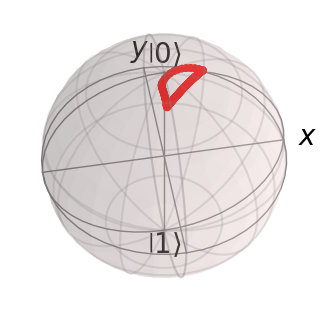

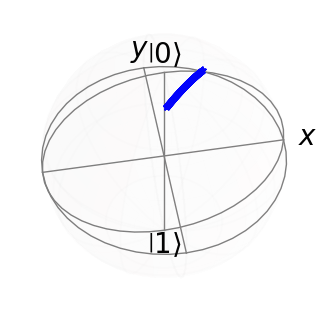

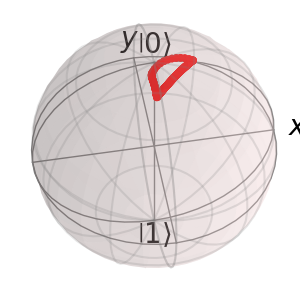

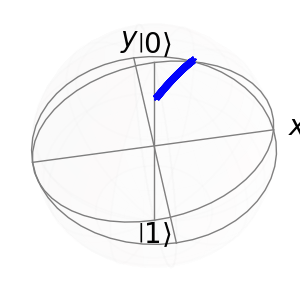

In [12]:
#improve plots

b.show()
newbloch.show()

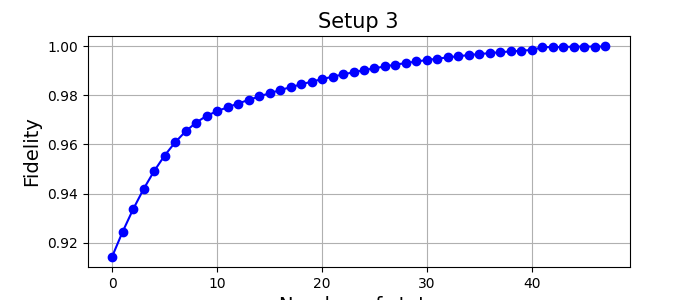

In [13]:
# data
xaxis = [i for i in range(len(finalestados))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, listfidelities, '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 3)

# show the plot
plt.show()

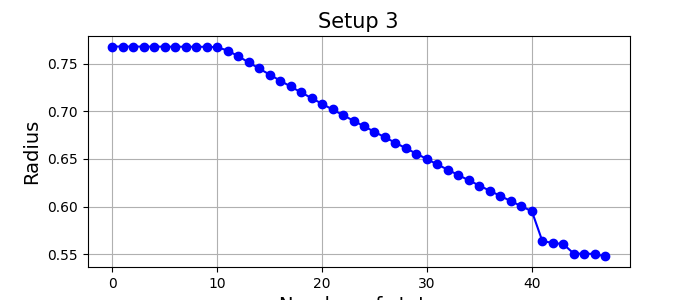

In [14]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,radius , '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Radius',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 3)

# show the plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (48,) and (47,)

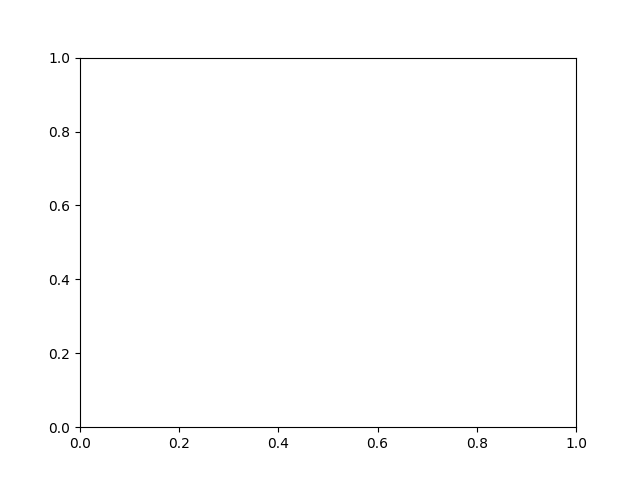

In [15]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,finaltiempotot, '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('total time',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)

# show the plot
plt.show()

In [16]:
print(list_lambda_time[0:5])
print(vec_lambda[0:10])
len(list_lambda_time)

[3550.56674716773, 2946.82286400747, 3860.01315842326, 4119.99229875714, 6498.04565891621]
[61.2742005627058, 66.1754754389770, 72.2489523163035, 79.9079104001009, 89.7922670200548, 102.939219395468, 121.118307692969, 147.492623432852, 187.666770093428, 248.164669292313]


7

NameError: name 'fidelity_initial' is not defined

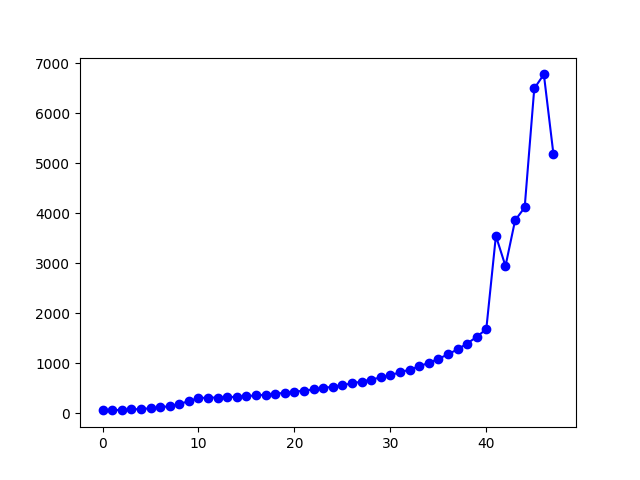

In [17]:
list_lambda =  vec_lambda+list_lambda_time
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, list_lambda, '-o', color='blue',label="$/lambda$")



#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('lambda',fontsize=14)
ax.set_title('Setup 3, lambda over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

## Testing with intermediary states

In the following cells we are going to use the geodesic that will give us some intermediary states in order to improve the control methodology

In [18]:
# Test values
#del(estadoslist, tiempolists, solution)
#qsri = 1/np.sqrt(3)*np.array([1.0, 1.0, 0.9])
#qssf = np.array([0.0, 0.9, 0.0])
qsri = 1/np.sqrt(3)*np.array([0.7, 0.8, 0.8])
qssf = 1/np.sqrt(3)*np.array([0.2, 0.9, 0.0])
fidelity_initial = fidelity(qsri,qssf)
w0 = 5
gamma_0 = 0.01
gamma_c = 10
Nmax = 50 ### with 20 is not working
imax = 7
deltat = 0.003

# Save initial and final states
auxri = qsri
auxsf = qssf

In [19]:
#numinter = 4 #number of intermediary states

numinter = 6 #number of intermediary states

#get the intermediary states from the geodesic
intermediaryqs=[geodesic((i)/(numinter-1),qsri,qssf) for i in range(numinter)]
intermediary = [bloch_vector(intermediaryqs[i]) for i in range(len(intermediaryqs)) ]
k = 1.0e-6
for i in range(numinter):
    delete_less_than_k(intermediary[i],k)

In [20]:
intermediary

[array([0.40414519+0.j, 0.46188022+0.j, 0.46188022+0.j]),
 array([0.35482391+0.j, 0.48760303+0.j, 0.37756751+0.j]),
 array([0.3005014+0.j, 0.5064531+0.j, 0.287933 +0.j]),
 array([0.24194332+0.j, 0.51816471+0.j, 0.19424008+0.j]),
 array([0.17997506+0.j, 0.5225728 +0.j, 0.09780935+0.j]),
 array([0.11547005+0.j, 0.51961524+0.j, 0.        +0.j])]

In [21]:
solestes =[]
soltimes=[]
auxtime = 0.0
list_lambda = list([])
for i in range(numinter-1):
#for i in range(3):
    #print("run",i)
    estadoslist, tiempolists, solution, lambdavec = control1setup3_int_states(qsri,intermediary[i+1],fidelity_initial,Nmax=Nmax,initime=auxtime)
    #print(estadoslist)
    solestes=solestes+estadoslist
    soltimes=soltimes+tiempolists
    qsri=estadoslist[-1]
    #print(tiempolists[-1])
    auxtime=tiempolists[-1]
    list_lambda=list_lambda+lambdavec

fide hasta inter   0.9979490555238515
diferencia  0.0014728011819085118
tiempo total/dt 1.0
fide hasta inter   0.9896932960817612
diferencia  0.003738611580138329
fide hasta inter   0.9920602536445131
diferencia  0.002366957562751959
fide hasta inter   0.9932029507244208
diferencia  0.001142697079907662
tiempo total/dt 3.0000000000000004
fide hasta inter   0.9851071410451395
diferencia  0.002439612758766141
fide hasta inter   0.9864864824926374
diferencia  0.0013793414474978505
tiempo total/dt 4.0
fide hasta inter   0.9771040319519557
diferencia  0.002962649417671548
fide hasta inter   0.9790685625652744
diferencia  0.0019645306133186935
fide hasta inter   0.980127654140027
diferencia  0.0010590915747525909
tiempo total/dt 5.999999999999999
fide hasta inter   0.9722187027502343
diferencia  0.0029298383768786573
fide hasta inter   0.9742160338644278
diferencia  0.0019973311141935346
fide hasta inter   0.9758498888057199
diferencia  0.00163385494129209
fide hasta inter   0.97738531129757

## Using the $i_{max}$ loop and intermediary states

In [22]:
estadoslist=solestes ## reuse the varaible 
tiempolists = soltimes ## reuse the variable
solestes, soltimes, vec_lambda_time=get_time_fidelity(estadoslist,tiempolists,solution,imax,qssf)
list_lambda = list_lambda + vec_lambda_time

Find time with fidelity
New quantum state [0.1178362  0.60611751 0.03147468]
Find time with fidelity
New quantum state [0.11629886 0.60563994 0.01017806]
Find time with fidelity
New quantum state [0.1151841  0.59512541 0.02936458]
Find time with fidelity
New quantum state [0.11499507 0.59517591 0.01230001]
Find time with fidelity
New quantum state [0.12088377 0.57445986 0.02966393]
Find time with fidelity
New quantum state [0.11726548 0.57571197 0.01690799]
Find time with fidelity
New quantum state [0.11688462 0.5739675  0.00190044]


In [23]:
list_lambda

[302.064882105538,
 706.078574726027,
 151.299246329834,
 208.062982171255,
 327.062186776692,
 678.303128701519,
 200.280239315839,
 298.224149139667,
 548.413641848664,
 177.706704084606,
 247.480606038182,
 387.245823688862,
 544.266906220573,
 195.117994557545,
 265.810869967836,
 326.588132924641,
 330.710348341011,
 331.611179108503,
 337.604098453427,
 346.776339110041,
 358.359211762561,
 372.048051305581,
 387.699487372494,
 405.246014036221,
 424.669037578349,
 445.988579212812,
 469.259053245692,
 1032.21011854405,
 1084.73603831770,
 1104.60418615908,
 1295.86765232478,
 1214.47176268459,
 1798.34382945226,
 1657.07991993429]

In [24]:
### for plots using intermediary states

# radius and fidelities
radiusint = [np.sqrt((solestes[i][0])**2+(solestes[i][1])**2+(solestes[i][2])**2) for i in range(len(solestes))]
listfidelitiesint=[fidelity(solestes[i],qssf) for i in range(len(solestes))]

In [25]:
listfidelitiesint

[0.9143653117663832,
 0.9143653117663832,
 0.9335327801968414,
 0.9414314995724868,
 0.9414314995724868,
 0.9551132680238894,
 0.9551132680238894,
 0.9655460721859042,
 0.9692888643733556,
 0.9692888643733556,
 0.9742160338644278,
 0.9758498888057199,
 0.977385311297579,
 0.9788351774895163,
 0.9802066923079439,
 0.9815076181762541,
 0.9827437401421593,
 0.9839191959217699,
 0.985037096234477,
 0.986099954136149,
 0.9871099343395715,
 0.9880689897572934,
 0.9969623748883127,
 0.9972407920656692,
 0.9976889678751655,
 0.997876028049828,
 0.9986682385983557,
 0.9987887302843079,
 0.9989347816862034]

In [26]:
### fidelity using intermediary states

fide_inter_1 = [fidelity(solestes[i],intermediary[1]) for i in range(len(solestes))]
fide_inter_2 = [fidelity(solestes[i],intermediary[2]) for i in range(len(solestes))]
fide_inter_3 = [fidelity(solestes[i],intermediary[3]) for i in range(len(solestes))]
fide_inter_4 = [fidelity(solestes[i],intermediary[3]) for i in range(len(solestes))]

## Plots using intermediary states and setup 3

In [27]:
### plots

### bloch sphere
length = 1
nrm = mpl.colors.Normalize(0,length)
#colors = cm.winter(nrm(range(length))) # options: cool, summer, winter, autumn etc.
colors = cm.winter(range(length)) # options: cool, summer, winter, autumn etc.

b = qutip.Bloch(view=[170,10],figsize=[3,3])
b.sphere_alpha=0.2
b.point_color = ['r'] # options: 'r', 'g', 'b' etc.
b.point_marker = ['o']
b.point_size = [20]
for i in range(len(solestes)):
    b.add_points(solestes[i])
    
## ploting geodesic
Numbergeo = 250
geolist = [geodesic(t/Numbergeo,auxri,qssf) for t in range(Numbergeo+1)]
colors2 = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

vectorgeo = [bloch_vector(rho) for rho in geolist]
#b.point_color = ['b'] # options: 'r', 'g', 'b' etc.
#b.point_marker = ['*']
#b.point_size = [20]
#for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
#    b.add_points(vectorgeo[i])

#b.add_points(auxri)
#b.add_points(auxsf)
newbloch=qutip.Bloch(view=[170,30],figsize=[3,3])
newbloch.point_color = ['b'] # options: 'r', 'g', 'b' etc.
newbloch.point_marker = ['*']
newbloch.point_size = [20]
newbloch.sphere_alpha=0.01
newbloch.frame_alpha=0.01
#newbloch.
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
    newbloch.add_points(vectorgeo[i],'s')

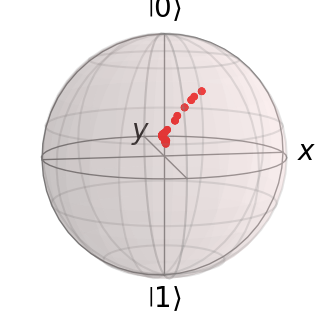

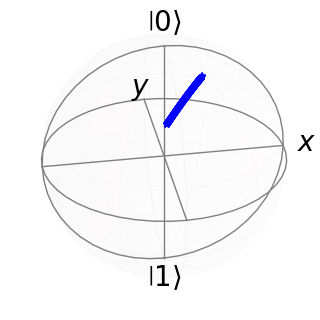

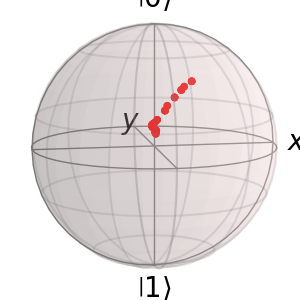

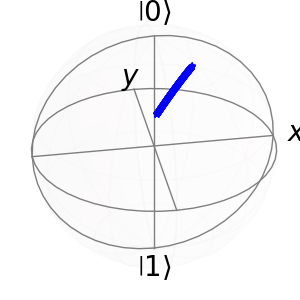

In [28]:
#improve plots
b.show()
newbloch.show()

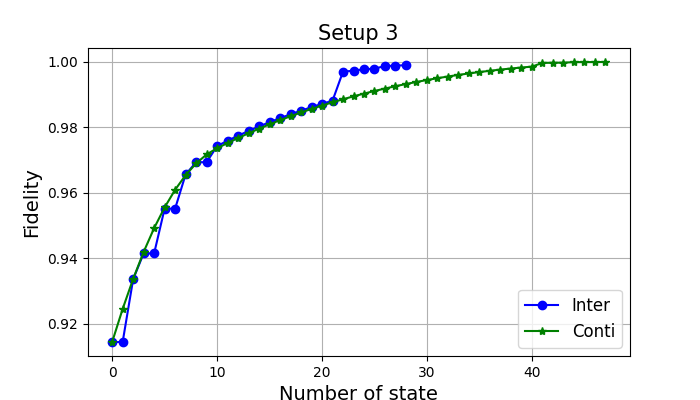

In [29]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, listfidelitiesint, '-o', color='blue',label="Inter")

#####################

# data without intermediary states
xaxis1 = [i for i in range(len(finalestados))]
ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

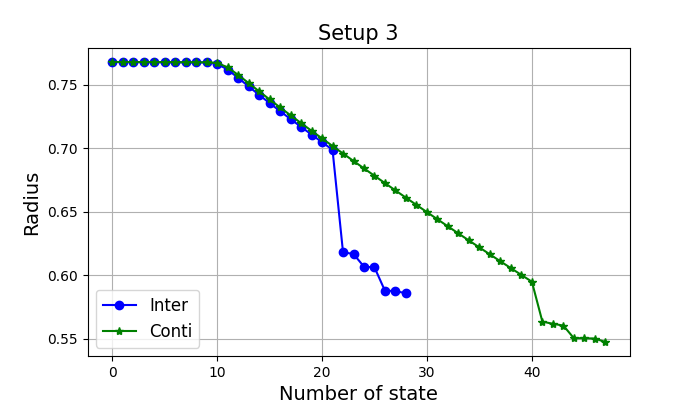

In [30]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,radiusint, '-o', color='blue',label="Inter")
ax.plot(xaxis1, radius, '-*', color='green',label="Conti")

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Radius',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower left')
# show the plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (48,) and (47,)

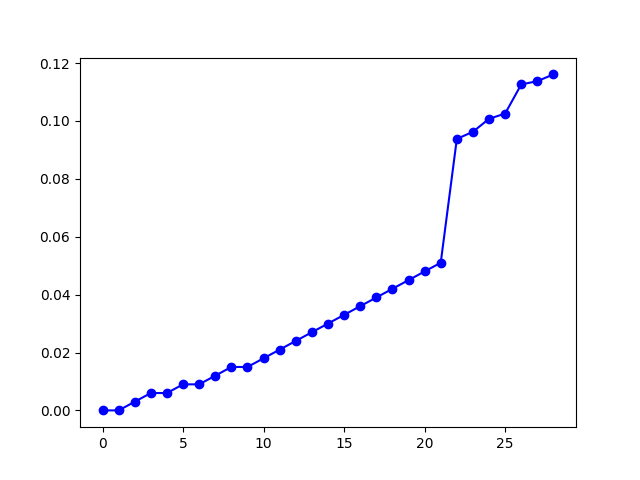

In [31]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,soltimes, '-o', color='blue',label="Inter")
ax.plot(xaxis1,finaltiempotot, '-o', color='green',label="Conti")

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('total time',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

In [ ]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, fide_inter_1, '-o', color='blue',label="Inter1")
ax.plot(xaxis, fide_inter_2, '-o', color='green',label="Inter2")
ax.plot(xaxis, fide_inter_3, '-o', color='black',label="Inter3")


#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3, fidelity over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

In [ ]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, list_lambda, '-o', color='blue',label="$/lambda$")



#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('lambda',fontsize=14)
ax.set_title('Setup 3, lambda over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

In [ ]:
list_lambda